# Variational Principle Review

1. Design a basis set for a 1D particle in a box bounded between $0 \leq x \leq a$ that yields a Hermitian Hamiltonian in the variational solution.  What is the basis set?  Give the variational solution energies for 1, 2 and 3 basis functions in this basis.  

## Problem 1.

An obvious basis set would be $\{g_i\}$ where

$g_i(x) = \sin(\frac{i \pi x}{a}) \quad \mathrm{for} \quad i=1,2,...N$.

This yields a trial wavefunction, $\phi(x)$,

$\phi(x) = \sum_{i=1}^N c_i \sin(\frac{i \pi x}{a}) $.

We must now evaluate matrix elements $S_{ij}$ and $H_{ij}$.  

$S_{ij} = \langle g_i|g_j \rangle$

$ = \int_0^a \sin(\frac{i \pi x}{a})\sin(\frac{j \pi x}{a})dx$

$ = \frac{a}{2}\delta_{i,j}$.  

*** SHOW THIS!!!***

In [4]:
# While you should prove this using analytic integration, you can also check this using numeric integration
import numpy as np
from scipy import integrate
# set a=1
a=1.0
x=np.arange(0,a,0.0001)
g1 = np.sin(np.pi*x/a)
g2 = np.sin(2*np.pi*x/a)
g3 = np.sin(3*np.pi*x/a)
s11 = integrate.simps(g1*g1,x)
s12 = integrate.simps(g1*g2,x)
s22 = integrate.simps(g2*g2,x)
s13 = integrate.simps(g1*g3,x)
s23 = integrate.simps(g2*g3,x)
s33 = integrate.simps(g3*g3,x)
print("S11=",s11)
print("S12=",s12)
print("S22=",s22)
print("S13=",s13)
print("S23=",s23)
print("S33=",s33)

('S11=', 0.49999999999835504)
('S12=', 6.579772469079778e-12)
('S22=', 0.49999999999342032)
('S13=', -4.9348139001464298e-12)
('S23=', 1.9739168166927489e-11)
('S33=', 0.49999999998519562)


So your overlap matrix elements should be

$S_{ij} = \begin{cases} \frac{a}{2}, i=j\\ 0, i\neq j\end{cases}$.

This leads to a diagonal matrix:

$\mathbf{S} = \begin{bmatrix} \frac{a}{2} & 0 & 0 \\ 0 & \frac{a}{2} & 0 \\ 0 & 0 & \frac{a}{2} \end{bmatrix} $

In [7]:
# populate and invert S
a = 1.0
S = np.zeros((3,3),dtype=np.float64)
for i in range(3):
    j = i
    S[i,j] = a/2.0
print S
Sinv = np.linalg.inv(S)
print Sinv

[[ 0.5  0.   0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0.5]]
[[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]


Similarly, you should be able to show that the Hamiltonian matrix element is

$H_{ij} = \frac{h^2i^2}{16\mu a}\delta_{i,j}$.

In [12]:
# populate Hamiltonian matrix
h = 1.0
mu = 1.0
a = 1.0
H = np.zeros((3,3),dtype=np.float64)
for i in range(3):
    j = i
    H[i,j] = h**2*(i+1)**2/(16.0*mu*a)
print H

[[ 0.0625  0.      0.    ]
 [ 0.      0.25    0.    ]
 [ 0.      0.      0.5625]]


In [14]:
# compute and diagonalize S^{-1}H

SinvH = np.dot(Sinv,H)
e,v = np.linalg.eig(SinvH)
print e
print v
print 1/8.

[ 0.125  0.5    1.125]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
0.125


Thus, in the basis, we get

$E_1 \leq 0.125 \frac{h^2}{\mu a^2}$

The analytic solution for $E_1$ is

$E_1 = \frac{\pi^2\hbar^2}{2a^2} = \frac{h^2}{8a^2} = 0.125 \frac{h^2}{a^2}$

***NOTE:*** this solution is for three basis functions.  In this case, however, the solution will not change if you use one or two basis functions.  Why?

# Normal Modes of CO$_2$

In [6]:
from scipy.misc import derivative
import numpy as np
# paramters for classical potential
kb = np.float64(8610.7/4.184) # kcal/mol/A^2
kang = np.float64(468.61/4.184)  # kcal/mol/rad^2
theta0 = np.float64(np.pi)
x0 = np.float64(1.16)

#def E(h1,o2,h3):
#    return 0.5*k1*(np.sqrt(np.linalg.norm(o2-h1))-x0)**2+0.5*k1*(np.sqrt(np.linalg.norm(o2-h3))-x0)**2
def E(x):
    o1 = x[:3]
    c2 = x[3:6]
    o3 = x[6:9]
    r21 = o1 - c2
    r21Mag = np.float64(np.linalg.norm(r21))
    r23 = o3 - c2
    r23Mag = np.float64(np.linalg.norm(r23))
    cosTheta = np.float64(min(max(np.dot(r21,r23)/(r21Mag*r23Mag),-1.0),1.0))
    theta = np.float64(np.arccos(cosTheta))
    energy = np.float64(0.5*kb*(r21Mag-x0)**2 + 0.5*kb*(r23Mag-x0)**2 + 0.5*kang*(theta-theta0)**2) 
#    print r21Mag, r23Mag, theta, energy
    return energy

def first_derivative(x,j,dx1):
    dx = np.zeros(x.size,dtype=np.float64)
    dx[j] = dx1
    forward = x+dx
    reverse = x-dx
#    print forward
#    print reverse
    return (E(forward)-E(reverse))/(2*dx1)
    
def second_derivative(x,i,j,dx1):
    dx = np.zeros(x.size,dtype=np.float64)
    dx[i] = dx1
    forward = x+dx
    reverse = forward-2*dx
    second_derivative = (first_derivative(forward,j,dx1)-first_derivative(reverse,j,dx1))/(2*dx1)
    return second_derivative
    
o1 = np.array([-1.16,0,0],dtype=np.float64)
c2 = np.array([0,0,0],dtype=np.float64)
o3 = np.array([1.16,0,0],dtype=np.float64)
coordinates = np.hstack((o1,c2,o3))
print("Energy of initial positions:",E(coordinates))
masses = np.empty(coordinates.size,dtype=np.float64)
masses[0:3] = 16.0E-3
masses[3:6] = 12.0E-3
masses[6:9] = 16.0E-3
# we need to compute the Hessian matrix (3x3 second derivative matrix)
H = np.empty((9,9),dtype=np.float64)
dx1 = 1E-4
for i in range(9):
    for j in range(9):
#        print i, j
        H[i,j] = second_derivative(coordinates,i,j,dx1)/np.sqrt(masses[i]*masses[j])
#        H[i,j] = first_derivative(coordinates,i,dx1)
#print H
e,v=np.linalg.eig(H)
idx = e.argsort()   
e = e[idx]
v = v[:,idx]

e = np.sqrt(e)*np.sqrt(4.184E23)/(3.0E10*2*np.pi)

print e
#print v[:,-1],v[:,-2],v[:,-3],v[:,-4]

('Energy of initial positions:', 0.0)
[             nan              nan   1.64260939e-05   1.08231241e-01
   1.08231241e-01   6.70250894e+02   6.70250894e+02   1.23071676e+03
   2.35664318e+03]


/Users/martinmccullagh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


(-2, 2)

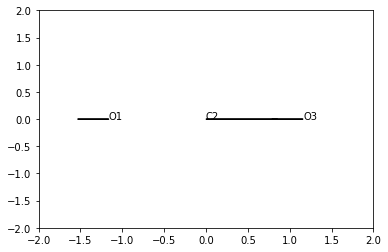

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(o1[0],o1[1],v[0,-1],v[1,-1],fc='r')
plt.arrow(c2[0],c2[1],v[3,-1],v[4,-1],fc='r')
plt.arrow(o3[0],o3[1],v[6,-1],v[7,-1],fc='r')
plt.text(o1[0],o1[1],'O1')
plt.text(c2[0],c2[1],'C2')
plt.text(o3[0],o3[1],'O3')
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

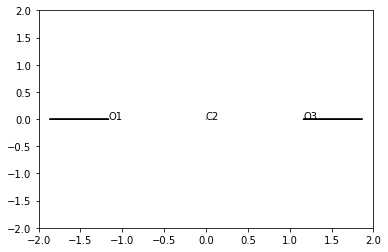

In [8]:
import matplotlib.pyplot as plt
plt.arrow(o1[0],o1[1],v[0,-2],v[1,-2],fc='r')
plt.arrow(c2[0],c2[1],v[3,-2],v[4,-2],fc='r')
plt.arrow(o3[0],o3[1],v[6,-2],v[7,-2],fc='r')
plt.text(o1[0],o1[1],'O1')
plt.text(c2[0],c2[1],'C2')
plt.text(o3[0],o3[1],'O3')
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

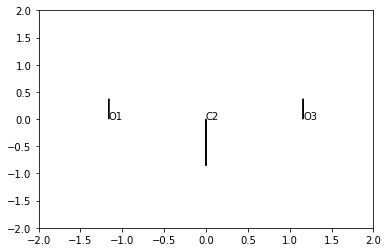

In [9]:
# xz plane bend
plt.arrow(o1[0],o1[1],v[0,-3],v[2,-3],fc='r')
plt.arrow(c2[0],c2[1],v[3,-3],v[5,-3],fc='r')
plt.arrow(o3[0],o3[1],v[6,-3],v[8,-3],fc='r')
plt.text(o1[0],o1[1],'O1')
plt.text(c2[0],c2[1],'C2')
plt.text(o3[0],o3[1],'O3')
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

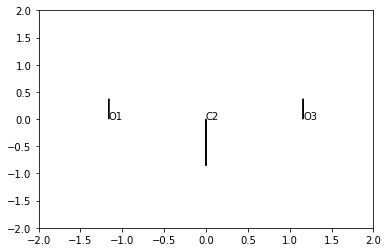

In [11]:
# xy plane bend
plt.arrow(o1[0],o1[1],v[0,-4],v[1,-4],fc='r')
plt.arrow(c2[0],c2[1],v[3,-4],v[4,-4],fc='r')
plt.arrow(o3[0],o3[1],v[6,-4],v[7,-4],fc='r')
plt.text(o1[0],o1[1],'O1')
plt.text(c2[0],c2[1],'C2')
plt.text(o3[0],o3[1],'O3')
plt.xlim(-2,2)
plt.ylim(-2,2)